In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import json, itertools
import time
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

# Counting number of words per person per session

Counting the number of interventions per member per session can be done following along the same process.

Importing a json file containing a map between active PersonNumber's and PersonIdCode's

In [2]:
with open('data/active_PersonNumber_PersonIdCode_map.json') as data_file:
    person_map = json.load(data_file)
    
active_ids = list(person_map.values())
active_ids.sort()
active_numbers = list(person_map.keys())
active_numbers.sort()

Importing info about the parliament members

In [3]:
mmbr = pd.read_csv('data/MemberCouncil.csv')
# the ppl DataFrame will be useful to map PersonNumber to PersonIdCode
ppl = pd.read_csv('data/Person.csv').dropna(axis=0, subset=['PersonNumber', 'PersonIdCode'])

In [4]:
ppl = pd.read_csv('data/people_jonas.csv').set_index('PersonIdCode')

Importing a cleaned version of the transcripts containing no NaN on either PersonNumber or Text

In [5]:
transc = pd.read_csv('new_data/transcript2_clean.csv').drop('Unnamed: 0', axis=1)

Building the DataFrame that will store our calculations

In [6]:
# columns
cols = ['PersonIdCode']
cols.extend(transc.IdSession.unique().tolist())
df = pd.DataFrame(columns=cols)
df.PersonIdCode = ppl.index
df.fillna(value=0, inplace=True)
df.set_index('PersonIdCode', inplace=True)

In [7]:
df.tail(2)

,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,4616,4617,4618,4619,4620,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,49,5001,3,5002,59,5003,4,5004,5,5005,6,5006
PersonIdCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
for row in transc.iterrows():
    row = row[1]
    #print(row['PersonNumber'])
    if str(row['PersonNumber']) in active_numbers:
        # by changing the += to simply '1', we can compute the # of interventions
        #df.loc[int(str(person_map[str(row['PersonNumber'])])), row['IdSession']] += len(ut.to_text(row['Text']).split())
        df.loc[int(str(person_map[str(row['PersonNumber'])])), row['IdSession']] += 1

In [9]:
df.sort_index(inplace=True)

In [10]:
df.head(3)

,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,4616,4617,4618,4619,4620,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,49,5001,3,5002,59,5003,4,5004,5,5005,6,5006
PersonIdCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,9,1,0,0,0,0,0,2,2,4,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,3,0,3,0,14
2061,0,0,2,0,1,4,0,3,5,1,19,4,0,3,9,2,3,5,2,11,2,10,0,19,10,7,10,9,12,20,27,0,25,17,20,16,21,38,20,9,1,11,15,24,18,0,20,8,16,18,17,17,14,32,19,0,25,14,13,11,0,24,13,27,25,0,9,15,13,26,0,16,11,21,21,0,21,16,0,22,0,8,0,0,0,22,0,37,0,24
2129,2,10,6,7,5,6,0,1,4,6,5,8,5,10,12,0,9,0,13,11,13,27,25,7,30,4,29,19,19,0,19,3,26,19,18,29,13,16,14,12,0,4,12,21,20,14,18,0,32,23,21,15,24,16,20,9,30,53,19,35,9,30,33,12,23,9,23,23,25,17,10,23,21,10,16,5,27,29,0,19,0,20,0,9,0,13,0,25,0,13


Taking a quick look at the data

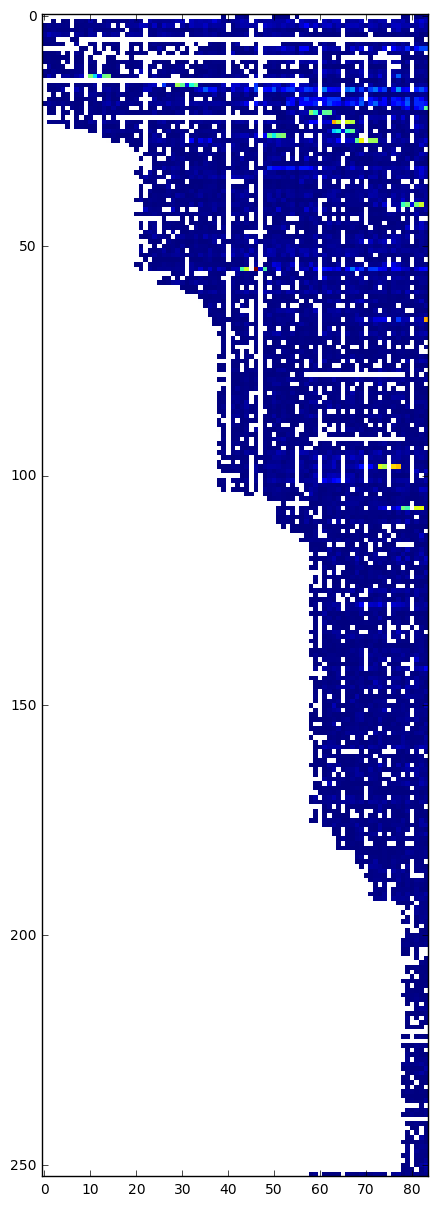

In [13]:
B = df.replace(0, np.nan).drop([49, 3, 4, 5, 59, 6], axis=1)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(B, interpolation="none")

plt.show()

Dropping weird sessions (checked, they're dummies)

In [16]:
df = df.drop([49, 3, 4, 5, 59, 6], axis=1)

Saving

In [17]:
df.to_csv('new_data/n_int.csv')